In [1]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pymysql
import config
%matplotlib inline
import seaborn as sns

In [2]:
conn = pymysql.connect(config.host, user=config.username,port=config.port,
                           passwd=config.password)

#gather all historical data to build model
RideWaits = pd.read_sql_query("call DisneyDB.RideWaitQuery('2,7,8,9')", conn)

## The Magic Behind Magic Hours

Extra magic hours are one of the larger draws to signing on to stay on property at Walt Disney World Resort. The benefit of being able to glamorously walk into the park an hour before all the other plebians or stay an hour later is one that most assume is well worth the extra cost of the Disney sponsored Resort hotel. Is it worth it in terms of wait times? And if you had to maximize your day around extra magic hours, how would you do it? Do extra magic hours make more of a difference at certain parks, times of day, tiers of rides? I'll try and answer these questions, and see if I can give any helpful advice when deciding which day to give yourself a little extra magic.

### A Brief History
If you're still wondering what an Extra Magic Hour is or how you sign up for one, don't worry I'll explain. The first thing you usually do at the infancy stages of planning your vacation to Walt Disney World Resort is settle on a hotel, or at least compile a list of hotel options. To convince you to stay on property (in one of the 25+ Disney owned and managed hotels) Disney has included some perks attached to Resort life. These perks include:

* Free Transportation between the airport and your resort
* Free MagicBands
* Free parking and transportation between resorts and parks
* Access to a Disney Dining Plan
* FastPass+ Reservations at 60 days from your vacation
* <b> Extra Magic Hours </b> 

The idea here is that Disney is rewarding you for spending the extra cash to stay within close proximity of the parks. Personally I always recommend staying on property. It has a different feel entirely. From the moment you drive under that Walt Disney World arch you are now under the magical spell of the mouse and won't lose that feeling until you check out at the end of your stay. 

So back to Extra Magic Hours. You picked your hotel and you decided to stay on property. Good choice. You're planning what days to go to what park and you notice that one of the days you're thinking of going to Magic Kingdom has two sets of hours, and one has a tag of Extra Magic Hours by it. Well what's the difference? Since you chose to stay on property, you are now viewed as first class under the eyes of Disney. This Extra Magic Hour entitles you to expereince a select list of attractions before the park opens to the general public. The thought is that if you get to the park before the general public, you may be able to experience some of the highest priority rides with much shorter waits, or get those much desired pictures in front of the castle without a sea of humans photobombing you. There is no sign up for Extra Magic Hours, you just show up with your magic band and walk right in. The caveat is that most days only have one park with Extra Magic Hours, and typically it is either only in the morning or the evening, not both. 

The thought is that since a large number of people stay on resort property, the one park with Extra Magic Hours that day draws the largest percentage of people from the resorts. This surges the park with the bonus hours and tends to deplete the others. So now we have the question of, is it worth it? Should I go to or avoid that park that day?

In [3]:
RideWaits["RideId"] = pd.Categorical(RideWaits["RideId"])
#RideWaits["Status"] = pd.Categorical(RideWaits["Status"])
RideWaits["ParkId"] = pd.Categorical(RideWaits["ParkId"])
RideWaits["Tier"] = pd.Categorical(RideWaits["Tier"])
RideWaits["ParkName"] = pd.Categorical(RideWaits["ParkName"])
RideWaits["IntellectualProp"] = pd.Categorical(RideWaits["IntellectualProp"])
RideWaits["Date"] = pd.to_datetime(RideWaits["Date"], infer_datetime_format = True)
RideWaits["OpeningDate"] = pd.to_datetime(RideWaits["OpeningDate"], infer_datetime_format = True)
RideWaits["Time"] = pd.to_datetime(RideWaits["Time"], format = '%H:%M').dt.time
RideWaits["ParkOpen"] = pd.to_datetime(RideWaits["ParkOpen"], format = '%I:%M %p').dt.strftime('%H:%M')
RideWaits["ParkOpen"] = pd.to_datetime(RideWaits["ParkOpen"], format = '%H:%M').dt.time
RideWaits["ParkClose"] = pd.to_datetime(RideWaits["ParkClose"], format = '%I:%M %p').dt.strftime('%H:%M')
RideWaits["ParkClose"] = pd.to_datetime(RideWaits["ParkClose"], format = '%H:%M').dt.time
RideWaits["DayOfWeek"] = [datetime.weekday(x) for x in RideWaits["Date"]]
RideWaits["EMHOpen"] = pd.to_datetime(RideWaits["EMHOpen"], format = '%I:%M %p', errors = 'coerce').dt.strftime('%H:%M')
RideWaits["EMHClose"] = pd.to_datetime(RideWaits["EMHClose"], format = '%I:%M %p', errors = 'coerce').dt.strftime('%H:%M')
RideWaits["EMHOpen"] = pd.to_datetime(RideWaits["EMHOpen"], format = '%H:%M', errors = 'coerce').dt.time
RideWaits["EMHClose"] = pd.to_datetime(RideWaits["EMHClose"], format = '%H:%M', errors = 'coerce').dt.time
RideWaits["Weekend"] = [0 if x == 0 or x == 1 or x ==2 or x==3 or x==4 else 1 for x in RideWaits["DayOfWeek"]]
RideWaits["Weekend"].value_counts()
RideWaits["CharacterExperience"] = [1 if ("Meet" in x) or ("Encounter" in x) or ("Visa" in x) else 0 for x in RideWaits["Name"]]

In [4]:
RideWaits["Date"].value_counts()

2018-09-19    6872
2018-10-04    5312
2018-10-11    3967
2018-10-10    3434
2018-09-29    3433
2018-10-13    3276
2018-10-03    3263
2018-09-22    3237
2018-09-26    3217
2018-10-09    3208
2018-10-06    3202
2018-09-28    3191
2018-09-20    3186
2018-10-20    3172
2018-10-12    3154
2018-09-25    3151
2018-10-17    3144
2018-10-05    3128
2018-10-19    3126
2018-10-28    3120
2018-10-25    3120
2018-10-24    3116
2018-10-23    3115
2018-10-02    3111
2018-10-29    3094
2018-10-26    3093
2018-09-30    3084
2018-10-15    3076
2018-10-16    3074
2018-11-02    3064
2018-09-23    3062
2018-11-03    3058
2018-10-21    3054
2018-10-01    3041
2018-10-18    3020
2018-10-22    3014
2018-10-27    2994
2018-10-14    2993
2018-10-30    2991
2018-10-08    2952
2018-09-27    2867
2018-11-01    2835
2018-10-07    2829
2018-09-24    2807
2018-11-05    2363
2018-10-31    1588
2018-09-21    1435
2018-11-04     479
Name: Date, dtype: int64

In [5]:
validTime = []
inEMH = []
emhDay = []
timeSinceStart = []
timeSinceMidDay = []
magicHourType = []
timeSinceOpenMinutes = []

for index, row in RideWaits.iterrows():
    #print(row)
    tempTime = datetime.now()
    cTime = row["Time"]
    pOpen = row["ParkOpen"]
    pClose = row["ParkClose"]
    currentParkTime = tempTime.replace(hour = cTime.hour, minute = cTime.minute, second = 0, microsecond = 0)
    parkOpen = tempTime.replace(hour = pOpen.hour, minute = pOpen.minute, second = 0, microsecond = 0)
    parkClose = tempTime.replace(hour = pClose.hour, minute = pClose.minute, second = 0, microsecond = 0)
    if parkClose < parkOpen:
        parkClose = parkClose.replace(day = parkClose.day + 1)
    if (pd.notnull(row["EMHOpen"])) & (pd.notnull(row["EMHClose"])):
        eOpen = row["EMHOpen"]
        #print(eOpen)
        eClose = row["EMHClose"]
        #print(eClose)
        emhOpen = tempTime.replace(hour = eOpen.hour, minute = eOpen.minute, second = 0, microsecond = 0)
        emhClose = tempTime.replace(hour = eClose.hour, minute = eClose.minute, second = 0, microsecond = 0)
        if emhClose < emhOpen:
            emhClose = emhClose.replace(day = emhClose.day + 1)
        emh = "ok"
        emhDay.append(1)
        if emhClose.hour == parkOpen.hour:
            magicHourType.append("Morning")
        else:
            magicHourType.append("Night")
    else:
        emh = "none"
        emhDay.append(0)
        magicHourType.append("None")
        
    #print(emh)
    if (currentParkTime < parkClose) & (currentParkTime > parkOpen):
        #print("Current Time is: " + str(currentParkTime) + " and ParkHours are "+ str(parkOpen) +" to " + str(parkClose) + " " +str(validtime))
        tSinceOpen = currentParkTime.hour - parkOpen.hour
        tSinceOpenMinutes = currentParkTime - parkOpen
        tSinceMidDay = abs(currentParkTime.hour - 14)
        if currentParkTime.hour < parkOpen.hour:
            tSinceOpen = currentParkTime.hour + 24 - parkOpen.hour
            tSinceOpenMinutes = currentParkTime.replace(day = currentParkTime.day + 1) - parkOpen
            tSinceMidDay = abs(currentParkTime.hour - 14 + 24)
        validTime.append(1)
        inEMH.append(0)
    else:
        if (emh == "ok"):
            if (currentParkTime < emhClose) & (currentParkTime > emhOpen):
                validTime.append(1)
                inEMH.append(1)
                if (emhClose.hour == parkOpen.hour):
                    tSinceOpen = currentParkTime.hour - emhOpen.hour
                    tSinceOpenMinutes = currentParkTime - emhOpen
                    tSinceMidDay = abs(currentParkTime.hour - 14)

                else:
                    if currentParkTime.hour < parkOpen.hour:
                        tSinceOpen = currentParkTime.hour + 24 - parkOpen.hour
                        tSinceOpenMinutes = currentParkTime.replace(day = currentParkTime.day + 1) - parkOpen
                        tSinceMidDay = abs(currentParkTime.hour - 14 + 24)
                    else:
                        tSinceOpen = currentParkTime.hour - parkOpen.hour
                        tSinceOpenMinutes = currentParkTime - parkOpen
                        tSinceMidDay = abs(currentParkTime.hour - 14)
            else:
                validTime.append(0)
                inEMH.append(0)
        else:
            validTime.append(0)
            inEMH.append(0)
    timeSinceStart.append(tSinceOpen)
    timeSinceMidDay.append(tSinceMidDay)
    timeSinceOpenMinutes.append(tSinceOpenMinutes)


RideWaits["inEMH"] = inEMH
RideWaits["validTime"] = validTime
RideWaits["EMHDay"] = emhDay
RideWaits["TimeSinceOpen"] = timeSinceStart
RideWaits["TimeSinceMidday"] = timeSinceMidDay
RideWaits["MagicHourType"] = magicHourType
RideWaits["MinutesSinceOpen"] = [x.total_seconds()/60 for x in timeSinceOpenMinutes]
#RideWaits["SimpleStatus"] = pd.Categorical(RideWaits["SimpleStatus"])
RideWaits = RideWaits[RideWaits["validTime"] == 1]

RideWaits["Month"] = RideWaits["Date"].dt.month
RideWaits["TimeSinceRideOpen"] = (RideWaits["Date"] - RideWaits["OpeningDate"]).dt.days

## The Data
For this analysis we will be using wait times between September 19th, 2018 and October 31st, 2018 collected every 15 minutes while the park is open. We have assigned each wait time to be either in an extra magic hour window or not. We have also categorized things like the month but because we only have two months, it may not be particularly helpful at this time, and we should revisit this in the future once we have more information.

## The Analysis

In [6]:
RideWaits["Wait"].describe()

count    130372.000000
mean         30.321979
std          24.577306
min           0.000000
25%          15.000000
50%          25.000000
75%          40.000000
max         335.000000
Name: Wait, dtype: float64

C:\Users\chrisA\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


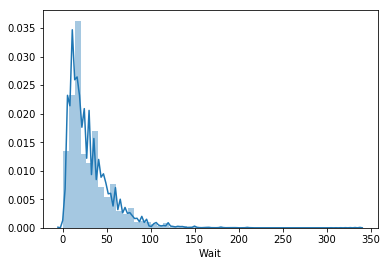

In [7]:
import seaborn as sns
%matplotlib inline

sns.distplot(RideWaits['Wait'])

The average wait times across all segments and ride types in this time window was 30.2 minutes. We also see that our wait times are heavily left skewed. Let's jump right into extra magic hours.

First how does the wait compare over the course of the whole day between an extra magic hour day and a non extra magic hour day. 

In [8]:
RideWaits.groupby('EMHDay')['Wait'].describe()

,count,mean,std,min,25%,50%,75%,max
EMHDay,,,,,,,,
0,93673.0,30.154143,24.188175,0.0,15.0,25.0,40.0,335.0
1,36699.0,30.750375,25.539025,0.0,10.0,25.0,40.0,240.0


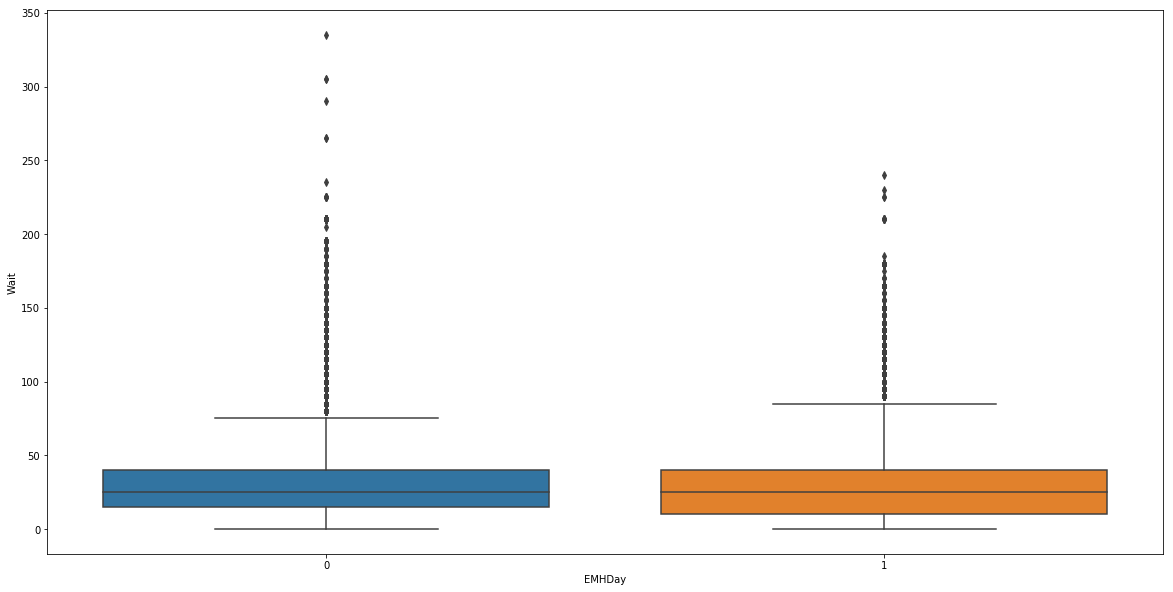

In [9]:
plt.subplots(figsize = (20,10))
ax = sns.boxplot(x = "EMHDay", y = "Wait", data = RideWaits)
plt.show()

In [10]:
from scipy import stats
t, p = stats.ttest_ind(RideWaits[RideWaits["EMHDay"] == 0]["Wait"], RideWaits[RideWaits["EMHDay"]==1]["Wait"])
print(p)

8.167462361196462e-05


This isn't really statistically significant. This would lead us to believe there isn't enough evidence to say that a day that had extra magic hours experiences different wait times than a day that did not have extra magic hours. The difference in means was only 0.3 minutes so not enough to really warrant avoiding a park just because it has Extra Magic Hours and you don't want to deal with the crowd of people. What about in the Extra Magic Hours. Are the wait times significantly lower than normal?

In [11]:
all_waits = RideWaits.groupby('inEMH')['Wait'].describe()
all_waits

,count,mean,std,min,25%,50%,75%,max
inEMH,,,,,,,,
0,127911.0,30.571100,24.595028,0.0,15.0,25.0,40.0,335.0
1,2461.0,17.373832,19.698418,0.0,5.0,10.0,20.0,180.0


That certainly looks like a significant difference.

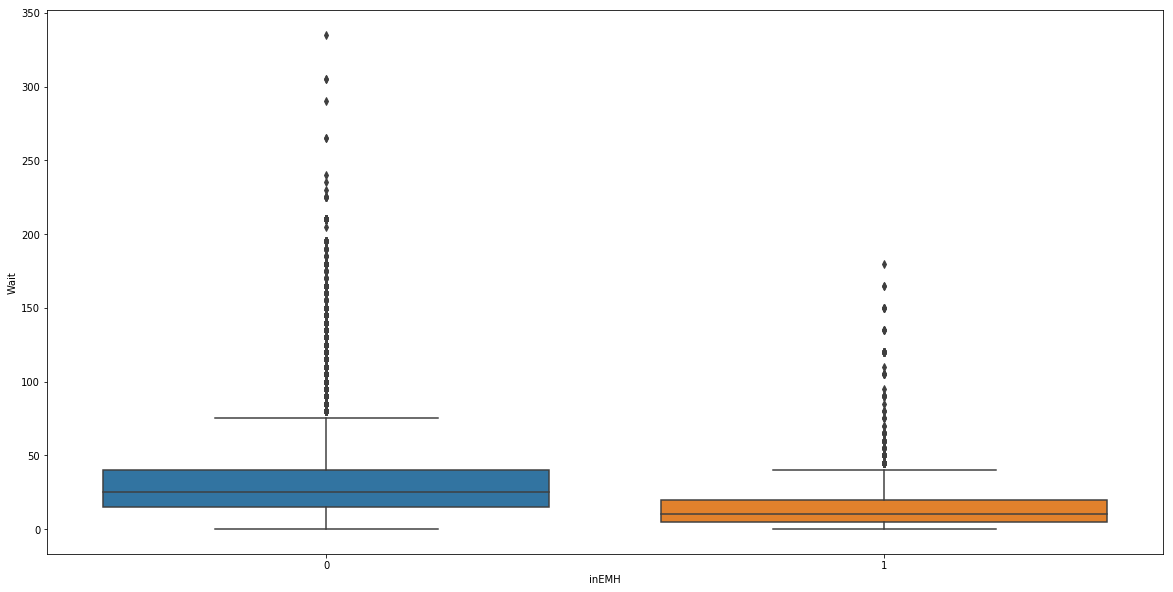

In [12]:
plt.subplots(figsize = (20,10))
ax = sns.boxplot(x = "inEMH", y = "Wait", data = RideWaits)
plt.show()

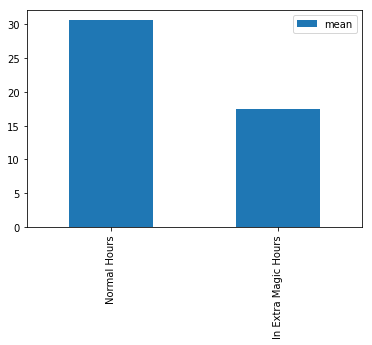

In [13]:
all_waits.index = ['Normal Hours', 'In Extra Magic Hours']
all_waits.plot.bar(y = "mean")

In [14]:
t, p = stats.ttest_ind(RideWaits[RideWaits["inEMH"] == 0]["Wait"], RideWaits[RideWaits["inEMH"]==1]["Wait"])
print(p)

7.90423272092147e-154


This is significant. This causes us to believe that rides inside of Extra Magic Hours experience a much lower wait than those outside of Extra Magic Hours. Alright, so Disney is right in there assessment that you will experience lower waits. Does it matter which type of Extra Magic Hour you experience? Morning or Night?

In [15]:
inextra_magic = RideWaits[RideWaits['inEMH'] == 1].groupby('MagicHourType')['Wait'].describe()
inextra_magic

,count,mean,std,min,25%,50%,75%,max
MagicHourType,,,,,,,,
Morning,908.0,19.861233,28.226805,0.0,5.0,10.0,20.0,180.0
Night,1553.0,15.919511,11.986648,0.0,5.0,10.0,20.0,90.0


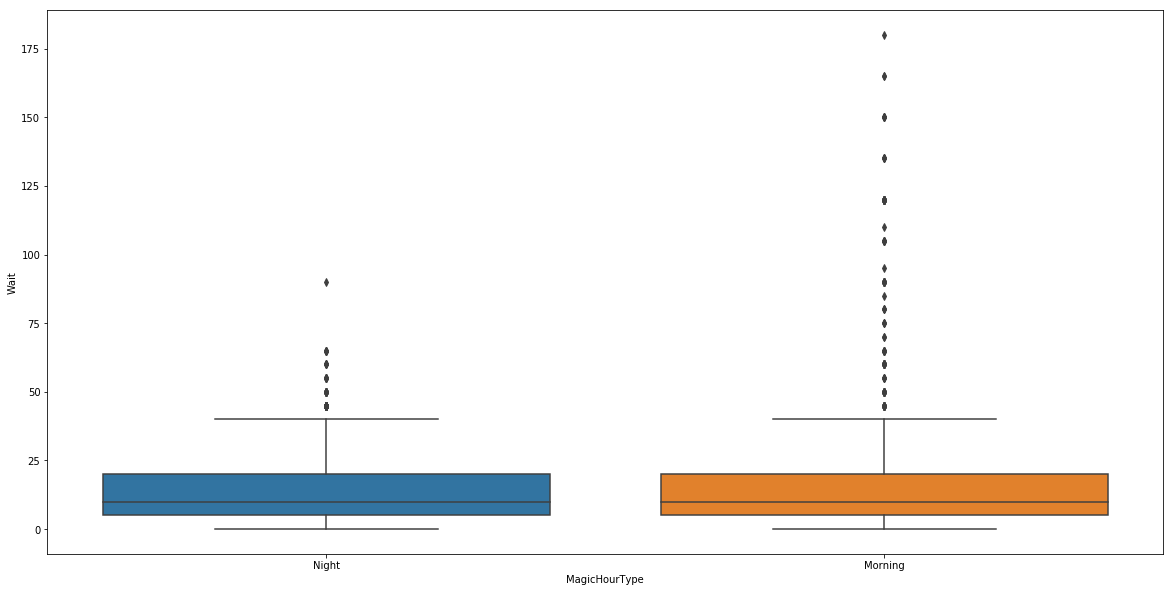

In [16]:
plt.subplots(figsize = (20,10))
ax = sns.boxplot(x = "MagicHourType", y = "Wait", data = RideWaits[RideWaits['inEMH'] == 1])
plt.show()

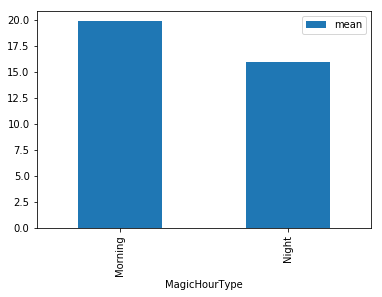

In [17]:
ax = inextra_magic.plot.bar(y = "mean")

A 4 minute difference is not small when comparing wait times. Perhaps there is some statistical significance between the two.

In [18]:
inemhWaits = RideWaits[RideWaits['inEMH'] == 1]
t, p = stats.ttest_ind(inemhWaits[inemhWaits["MagicHourType"] == "Night"]["Wait"], inemhWaits[inemhWaits["MagicHourType"]=="Morning"]["Wait"])
print(p)

1.5892406675142072e-06


Again the difference is statistically significant. Given the choice between a morning extra magic hour or a night extra magic hour, the night will have generally lower wait times. This may be due to a number of factors, probably mostly general exhaustion and children wanting to go to bed.

Let's look at every day individually and see which days have the biggest gaps between being an Extra Magic Hour day or not. For example you would want to avoid a park that has an Extra Magic Hour day on that day of the week if there is a large difference between the two.

In [19]:
RideWaits.groupby(['DayOfWeek','EMHDay'])['Wait'].describe()

count       mean        std  min   25%   50%   75%    max
DayOfWeek EMHDay                                                             
0         0       14935.0  32.414864  24.581952  0.0  15.0  25.0  45.0  190.0
          1        4081.0  37.836560  32.198762  0.0  15.0  30.0  50.0  225.0
1         0       11471.0  26.146631  21.188133  0.0  10.0  20.0  35.0  175.0
          1        3471.0  26.233074  22.084280  0.0  10.0  20.0  35.0  230.0
2         0       10358.0  24.913883  20.722718  5.0  10.0  20.0  35.0  290.0
          1       12287.0  30.933751  23.202823  0.0  15.0  25.0  45.0  185.0
3         0       16098.0  27.749410  22.305298  0.0  10.0  20.0  35.0  210.0
          1        4305.0  23.885017  18.485891  5.0  10.0  20.0  35.0  240.0
4         0       10347.0  32.767179  28.454498  0.0  15.0  25.0  45.0  335.0
          1        6093.0  25.268505  16.868708  0.0  10.0  20.0  35.0  105.0
5         0       18294.0  33.946649  23.587816  0.0  15.0  30.0  45.0  155.0
          1        3170.0  41.815457  38.785308  0.0  15.0  30.0  55.0  180.0
6         0       12170.0  30.875514  26.648611  0.0  15.0  25.0  40.0  235.0
          1        3292.0  34.513366  26.612988  5.0  15.0  25.0  50.0  135.0

We see the largest differences on Saturday. On Saturday in parks without Extra Magic Hours we see an average of 8 minutes less wait. Tuesdays, Thursdays, and Fridays appear to have negligible or negative difference between days with Extra Magic Hours and days without. Let's look into parks to see if the difference matters by the park.

In [20]:
by_park = RideWaits.groupby(['ParkName','EMHDay'])['Wait'].describe()
by_park

count       mean        std  min  \
ParkName                          EMHDay                                       
Disneys Animal Kingdom Theme Park 0       13355.0  36.423811  35.308395  5.0   
                                  1        6114.0  41.145731  37.700441  0.0   
Disneys Hollywood Studios         0       20694.0  32.303180  24.035366  5.0   
                                  1        3198.0  35.107567  26.717893  0.0   
EpCot                             0       18413.0  26.554065  20.037177  0.0   
                                  1        7965.0  24.505964  18.992983  0.0   
Magic Kingdom Park                0       41211.0  28.651743  20.816585  0.0   
                                  1       19422.0  29.321337  21.551864  0.0   

                                           25%   50%   75%    max  
ParkName                          EMHDay                           
Disneys Animal Kingdom Theme Park 0       10.0  25.0  50.0  305.0  
                                  1       15.0  30.0  55.0  225.0  
Disneys Hollywood Studios         0       15.0  25.0  45.0  190.0  
                                  1       15.0  25.0  50.0  135.0  
EpCot                             0       10.0  20.0  35.0  335.0  
                                  1       10.0  20.0  35.0  240.0  
Magic Kingdom Park                0       15.0  25.0  40.0  180.0  
                                  1       15.0  25.0  40.0  185.0

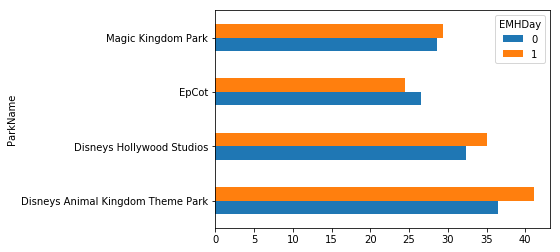

In [21]:
data = by_park["mean"]
data.unstack().plot(kind = 'barh')

I believe this tells you that you don't necessarily need to avoid parks like Epcot or Magic Kingdom on days with Extra Magic Hours. Perhaps, though, steer clear of Animal Kingdom and Hollywood studios if you don't intend on taking advantage of the early or late hour. This would potentially be more helpful to a person staying off property and they are forced to go to a park on an Extra Magic Hour day when they do not have access to those activities. In that case, if I were that person, I would prioritize avoiding Animal Kingdom on an Extra Magic Hour day and not stress so much about the others. 

What about the differences between being in and out of Extra Magic Hours. Where is your buck worth the most bang?

In [22]:
RideWaits.groupby(['ParkName','inEMH'])['Wait'].describe()

count       mean        std  min  \
ParkName                          inEMH                                       
Disneys Animal Kingdom Theme Park 0      19166.0  38.080455  36.058610  0.0   
                                  1        303.0  26.914191  39.629483  5.0   
Disneys Hollywood Studios         0      23748.0  32.716523  24.380347  0.0   
                                  1        144.0  26.416667  30.990975  5.0   
EpCot                             0      25821.0  26.180241  19.815383  0.0   
                                  1        557.0  14.596050  11.770750  5.0   
Magic Kingdom Park                0      59176.0  29.193896  21.122833  0.0   
                                  1       1457.0  15.557996  12.220090  0.0   

                                          25%   50%   75%    max  
ParkName                          inEMH                           
Disneys Animal Kingdom Theme Park 0      15.0  25.0  50.0  305.0  
                                  1       5.0  10.0  20.0  180.0  
Disneys Hollywood Studios         0      15.0  25.0  45.0  190.0  
                                  1       5.0  10.0  40.0  135.0  
EpCot                             0      10.0  20.0  35.0  335.0  
                                  1       5.0  10.0  20.0   65.0  
Magic Kingdom Park                0      15.0  25.0  40.0  185.0  
                                  1       5.0  10.0  20.0   90.0

This is where you can't afford to miss Extra Magic Hours. Magic Kingdom, which includes the high priority ride "Seven Dwarfs Mine Train" in its early morning offering, experiences a reduction in average wait by 14 minutes. That is a 50% reduction. Epcot and Animal Kingdom both have roughly 10 minute reductions, and Hollywood Studios falls in around 5 minutes. Let's look directly at tiers of rides to see how those fare between being in or out of Extra Magic Hours.

In [23]:
RideWaits.groupby(['Tier','inEMH'])['Wait'].describe()

count       mean        std  min   25%   50%   75%  \
Tier             inEMH                                                         
diversion        0      10420.0  23.236564  12.133570  0.0  15.0  20.0  30.0   
                 1         81.0  10.864198   6.163913  5.0   5.0  10.0  15.0   
headliner        0      17596.0  38.096442  26.110369  0.0  15.0  35.0  50.0   
                 1        282.0  15.904255  16.161376  5.0   5.0  10.0  20.0   
major_attraction 0      28716.0  30.603949  25.722778  0.0  10.0  20.0  45.0   
                 1        639.0  17.798122  18.434029  5.0  10.0  10.0  20.0   
minor_attraction 0      50778.0  24.195419  16.842589  0.0  10.0  20.0  35.0   
                 1       1103.0  13.567543  11.036843  0.0   5.0  10.0  20.0   
super_headliner  0      18361.0  46.914493  34.043327  5.0  20.0  40.0  60.0   
                 1        354.0  31.197740  35.264446  5.0  10.0  20.0  35.0   

                          max  
Tier             inEMH         
diversion        0      100.0  
                 1       35.0  
headliner        0      190.0  
                 1       80.0  
major_attraction 0      185.0  
                 1      135.0  
minor_attraction 0      120.0  
                 1       90.0  
super_headliner  0      335.0  
                 1      180.0

The most in demand rides in the park are called "Super Headliners". These include rides that would be in the top tier of getting fastpasses and most of the time you may only be able to ride once a day or once in a whole trip. These are rides like:
* Magic Kingdom:
    * Seven Dwarfs Mine Train (Magic Kingdom)
    * Splash Mountain (Magic Kingdom)
    * Space Mountain (Magic Kingdom)
* Hollywood Studios:
    * Twilight Zone Tower of Terror
* Epcot:
    * Test Track
    * Soarin
    * Mission:SPACE
* Animal Kingdom:
    * Avatar Flight of Passage
    * Kilimanjaro Safaris
    * Expedition Everest
    
We see a reduction in weight by nearly 16 minutes. Let's look at rides that are considered headliners and super headliners to grasp all the in demand rides to see how those differ between being in or out of Extra Magic Hours.

In [24]:
mine_train = RideWaits[RideWaits['Name'] == "Seven Dwarfs Mine Train"]
mine_train.groupby(['Name','inEMH'])['Wait'].describe()

count       mean        std   min   25%   50%  \
Name                    inEMH                                                   
Seven Dwarfs Mine Train 0      1960.0  76.551020  25.599349  10.0  60.0  70.0   
                        1        66.0  45.757576  12.837518  25.0  35.0  45.0   

                                75%    max  
Name                    inEMH               
Seven Dwarfs Mine Train 0      90.0  185.0  
                        1      55.0   80.0

In [25]:
big_rides = RideWaits[RideWaits['Tier'].isin(['headliner','super_headliner'])]
big_rides.groupby(['Name','inEMH'])['Wait'].describe()

count        mean  \
Name                                               inEMH                       
Avatar Flight of Passage                           0      2021.0  111.588323   
                                                   1        42.0  117.261905   
Big Thunder Mountain Railroad                      0      1957.0   33.763413   
                                                   1        52.0   14.423077   
DINOSAUR                                           0      1723.0   26.511898   
                                                   1        35.0    9.142857   
Expedition Everest - Legend of the Forbidden Mo... 0      1792.0   31.222098   
                                                   1        37.0    5.945946   
Kali River Rapids                                  0      1832.0   29.394105   
                                                   1         1.0    5.000000   
Kilimanjaro Safaris                                0      2006.0   36.375872   
                                                   1        34.0    9.411765   
Mission: SPACE                                     0      2323.0   20.531640   
                                                   1        42.0   14.523810   
Navi River Journey                                 0      1962.0   73.542304   
                                                   1        41.0   37.804878   
Pirates of the Caribbean                           0      2034.0   26.966568   
                                                   1        52.0    6.442308   
Rock n Roller Coaster Starring Aerosmith           0      1924.0   60.945946   
                                                   1        16.0   21.562500   
Soarin                                             0      2321.0   34.069367   
                                                   1        63.0   18.174603   
Space Mountain                                     0      1945.0   46.853470   
                                                   1        65.0   24.230769   
Spaceship Earth                                    0      2181.0   22.579092   
                                                   1        49.0    5.510204   
Splash Mountain                                    0      1931.0   41.390471   
Star Tours- The Adventures Continue                0      2012.0   21.212724   
                                                   1        18.0    5.833333   
Test Track                                         0      2029.0   60.093642   
                                                   1        54.0   37.037037   
The Twilight Zone Tower of Terror                  0      1993.0   43.754139   
                                                   1        17.0   14.647059   
Toy Story Mania!                                   0      1971.0   48.916794   
                                                   1        18.0   44.722222   

                                                                std   min  \
Name                                               inEMH                    
Avatar Flight of Passage                           0      37.932989  40.0   
                                                   1      26.714443  60.0   
Big Thunder Mountain Railroad                      0      19.618778   5.0   
                                                   1       7.899730   5.0   
DINOSAUR                                           0      15.520144   0.0   
                                                   1       2.264078   5.0   
Expedition Everest - Legend of the Forbidden Mo... 0      16.116958   5.0   
                                                   1       3.081720   5.0   
Kali River Rapids                                  0      21.420441   5.0   
                                                   1            NaN   5.0   
Kilimanjaro Safaris                                0      20.309974   5.0   
                                                   1      10.057765   5.0   
Mission: SPACE      

In [26]:
big_rides = RideWaits[RideWaits['Tier'].isin(['headliner','super_headliner'])]

differences = big_rides.groupby(['Name','inEMH'])['Wait'].describe()
rides = []
inEMH = []
outEMH = []
for index,row in differences.iterrows():
    #print(index[0])
#     print(row)
    if index[0] in ["Splash Mountain","Walt Disneys Carousel of Progress","The Hall Of Presidents","Muppet*Vision 3D","Jungle Cruise"]:
        continue
    ride_name = index[0]
    in_emh = index[1]
    if ride_name not in rides:
        rides.append(ride_name)
    
    if in_emh == 1:
        inEMH.append(row['mean'])
    else:
        outEMH.append(row['mean'])
        
differences_frame = {
    'rides' : rides,
    'inEMH' : inEMH,
    'outEMH': outEMH
}

differences_frame1 = pd.DataFrame(differences_frame)
differences_frame1['difference'] = differences_frame1['outEMH'] - differences_frame1['inEMH']

differences_frame1 = differences_frame1[['rides','outEMH','inEMH','difference']]
differences_frame1 = differences_frame1.sort_values(by = ['difference'])

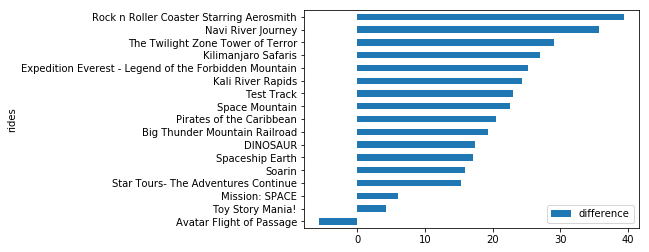

In [27]:
ax = differences_frame1.plot.barh(x = 'rides', y = 'difference', rot = 0)

These are our biggest rides. If we want to really prioritize our time at Disney World we want to get the most out of Extra Magic Hours and should be striving to reduce the wait on these rides as much as possible. A couple things of serious note from this diagram. First, 4 of the top 6 rides are in Animal Kingdom. That doesn't mean just blindly rush into Animal Kingdom on an Extra Magic Hour Day and go crazy. That means plan your Extra Magic Hour strategically with your pre booked fastpasses. Notice that the ride at the bottom actually has a longer wait in Extra Magic Hours. This leads me to believe that everyone has the same thought when running into the park early for the day, "Hit Avatar Flight of Passage, it has to be lower wait." Now that we are powered with this knowledge, I would plan my day at Animal Kingdom follows if possible:

* Do everything I can to book a fastpass for Avatar Flight of Passage. Even if it's later in the day around noon or so.
* Go early. Go to Extra Magic Hours
* Ride Navi River Journey first. Let everyone else get in line for Avatar Flight of Passage.
* After Navi River Journey, go do Kilimanjaro Safaris when it's nice and cool
* Right before rope drop I would go to Expedition Everest. This ride doesn't normally have a really high wait, so 20 minutes lower than normal puts it at basically a walk right on wait. 
* If you're up for another short wait, go to DINOSAUR! The wait will again be short.
* By the time rope drops and the general public is walking in to rush Avatar Flight of passage, you have now accomplished 4 of the biggest rides in the park. Go get some Flame Tree BBQ and relax and soak in your accomplishments for a well done start of your day.

In [28]:
import pymysql
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import transformations
import config
%matplotlib inline

conn = pymysql.connect(config.host, user=config.username,port=config.port,
                           passwd=config.password)

#gather all historical data to build model
RideWaits = pd.read_sql_query("call DisneyDB.RideWaitQuery('2,7,8,9')", conn)


starter_data = RideWaits.copy()

#transform data for model bulding
RideWaits = transformations.transformData(RideWaits)



C:\Users\chrisA\Documents\DisneyWaitTimes\DisneyWaits\src\transformations.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  RideWaits["Month"] = RideWaits["Date"].dt.month
C:\Users\chrisA\Documents\DisneyWaitTimes\DisneyWaits\src\transformations.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  RideWaits["TimeSinceRideOpen"] = (RideWaits["Date"] - RideWaits["OpeningDate"]).dt.days
C:\Users\chrisA\Documents\DisneyWaitTimes\DisneyWaits\src\transformations.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [68]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([column_name], axis = 1)
    return df

def get_shift(day, steps):
    previous_steps = {}
    for i in range(1,1+steps):
        current_steps = []
        test_day_current = day.reset_index()
        for index,row in test_day_current.iterrows():
            if index in list(range(i)):
                current_steps.append(0)
            else:
                current_steps.append(test_day_current.loc[index - i,'Wait'])
        
        name = "previous_step"+str(i)
        previous_steps[name] = current_steps
    
    for key,value in previous_steps.items():
        day[key] = value
        
    return day
    
    
def shift_data(ride_data, shift_range):
    new_data_frame = pd.DataFrame()
    distinct_rides = list(ride_data['RideId'].unique())
    for ride in distinct_rides:
        this_ride = ride_data[ride_data['RideId'] == ride]
        day_list = list(this_ride['Date'].unique())
        for day in day_list:
            day_data = this_ride[this_ride['Date'] == day]
            new_data = get_shift(day_data, shift_range)
            new_data_frame = pd.concat([new_data_frame, new_data])

    return new_data_frame

def model_transformation(data, num_shifts, start_day = True, by_ride = True):
    ride_waits = data
    
    if by_ride:
        important_columns = ['Wait','DayOfWeek','Weekend','inEMH','EMHDay','MagicHourType','Month','TimeSinceOpen','TimeSinceMidday','MinutesSinceOpen']
        dummy_columns = ['DayOfWeek','Weekend','inEMH','EMHDay','MagicHourType','Month']
    else:
        important_columns = ['RideId','Date', 'Wait','Name','Tier','Location','IntellectualProp','ParkId','DayOfWeek','Weekend','CharacterExperience','inEMH','EMHDay','TimeSinceOpen','TimeSinceMidday','MagicHourType','MinutesSinceOpen','Month']
        ride_waits = ride_waits[ride_waits['Location'] != ""]
        dummy_columns = ['RideId','Tier','Location','IntellectualProp','ParkId','DayOfWeek','Weekend','CharacterExperience','inEMH','EMHDay','MagicHourType','Month']
        ride_waits = ride_waits.drop(['Name'], axis = 1)
    ride_waits = ride_waits[important_columns]
    ride_waits = ride_waits.dropna(how = "any")
    
    if start_day == False:
        ride_waits = shift_data(ride_waits,num_shifts)
    
    for column in dummy_columns:
        ride_waits = create_dummies(ride_waits, column)
        
    correlation = ride_waits.corr()['Wait']
    key_correlations = correlation[abs(correlation) > .005]
    important_cols = list(key_correlations.index)
    shift_columns = []
    if start_day == False:
        shift_columns = ["previous_step" + str(x+1)  for x in range(num_shifts)]
    important_cols = important_cols + ["Wait","MinutesSinceOpen"] + shift_columns
    important_cols = [x for x in important_cols if x != "Weekend_0"]
    important_cols = [x for x in important_cols if x != "inEMH_0"]
    important_cols = list(set(important_cols))
    ride_waits_key = ride_waits[important_cols]
    
    
    return ride_waits_key



def new_data_transform(data, num_shifts, important_cols, start_day = True, by_ride = True):
    ride_waits = data
    
    if by_ride:
        important_columns = ['Wait','DayOfWeek','Weekend','inEMH','EMHDay','MagicHourType','Month','TimeSinceOpen','TimeSinceMidday','MinutesSinceOpen']
        dummy_columns = ['DayOfWeek','Weekend','inEMH','EMHDay','MagicHourType','Month']
    else:
        important_columns = ['RideId','Date', 'Wait','Name','Tier','Location','IntellectualProp','ParkId','DayOfWeek','Weekend','CharacterExperience','inEMH','EMHDay','TimeSinceOpen','TimeSinceMidday','MagicHourType','MinutesSinceOpen','Month']
        ride_waits = ride_waits[ride_waits['Location'] != ""]
        dummy_columns = ['RideId','Tier','Location','IntellectualProp','ParkId','DayOfWeek','Weekend','CharacterExperience','inEMH','EMHDay','MagicHourType','Month']
        ride_waits = ride_waits.drop(['Name'], axis = 1)
    

    ride_waits = ride_waits[important_columns]
    
    ride_waits = ride_waits.dropna(how = "any")
    
    if start_day == False:
        ride_waits = shift_data(ride_waits,num_shifts)
    for column in dummy_columns:
        ride_waits = create_dummies(ride_waits, column)
        
    missing_cols = [x for x in important_cols if x not in ride_waits.columns]
    for col in missing_cols:
        ride_waits[col] = 0
        
    return ride_waits




In [51]:
import sys
!{sys.executable} -m pip install eli5 --user


  Using cached https://files.pythonhosted.org/packages/c5/10/369f50bcd4621b263927b0a1519987a04383d4a98fb10438042ad410cf88/singledispatch-3.4.0.3-py2.py3-none-any.whl
  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\chrisA\AppData\Local\pip\Cache\wheels\2a\85\33\2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
Successfully built tabulate


  Cache entry deserialization failed, entry ignored
  The script tabulate.exe is installed in 'C:\Users\chrisA\AppData\Roaming\Python\Python36\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [69]:
from datetime import datetime
from pytz import timezone
tz = timezone('US/Eastern')
dtime = datetime.now(tz)
dtime = dtime.replace(hour = 7,minute = 0, second = 0, microsecond = 0)
date = dtime.date()
time = dtime.time().strftime("%H:%M")
from datetime import datetime
from dateutil.relativedelta import relativedelta
from pdpbox import pdp, get_dataset, info_plots
import eli5
from eli5.sklearn import PermutationImportance

def date_range(start_date, end_date, increment, period):
    result = []
    nxt = start_date
    delta = relativedelta(**{period:increment})
    while nxt <= end_date:
        result.append(nxt)
        nxt += delta
    return result

end_time = dtime.replace(hour = 23, minute = 45, second = 0, microsecond = 0)
time_list = date_range(dtime, end_time, 15, 'minutes')
time_list = [x.time().strftime("%H:%M") for x in time_list]


park_hours = pd.read_sql_query("select * from DisneyDB.ParkHours where Date = '" + str(date) + "'", conn)


def get_conf_interval(clf, df):
    conf_high_list = []
    conf_low_list = []
    for index, row in df.iterrows():
        current_row = df.loc[[index]]
        all_predictions = [estimator.predict(current_row) for estimator in clf.estimators_]
        mean = np.mean(all_predictions)
        pred_std = np.std(all_predictions)
        conf_high = (mean + 2*pred_std)
        conf_low = (mean - 2*pred_std)
        conf_high_list.append(conf_high)
        conf_low_list.append(conf_low)
    
    df['confidence_high'] = conf_high_list
    df['confidence_low'] = conf_low_list
    return df

def make_daily_prediction(current_ride,ride, time_list, best_params, todays_predictions,park_hours):
    ride_predictions = {}
    current_ride_fm = current_ride.copy()
    current_ride_fm = transformations.transformData(current_ride_fm)
    #print(current_ride.shape[0])
    #print(current_ride.columns)
    model_data = model_transformation(current_ride_fm, 1)
    important_columns = [x for x in model_data.columns if x != "Wait"]
    clf = RandomForestRegressor(**best_params)
    
    #scores = cross_val_score(clf, model_data[important_columns],model_data['Wait'], scoring = "neg_median_absolute_error", cv = 3)
    #ride_score = scores.mean()
    #ride_predictions['score'] = ride_score
    #print(model_data.head())
    clf.fit(model_data[important_columns], model_data['Wait'])
    pdp_plot = pdp.pdp_isolate(model = clf, dataset = model_data[important_columns], model_features = important_columns, feature = "inEMH_1")
    ride_predictions['features_used'] = important_columns
    predictions_frame = pd.DataFrame()
    ride_starter = current_ride.iloc[[0]]
    ride_predictions['pdp_plot'] = pdp_plot
    predictions_frame = pd.concat([ride_starter]*len(time_list),ignore_index = True)
    #need to change the park hours and date
    current_park_id = predictions_frame['ParkId'][0]
    todays_hours = park_hours[park_hours['ParkId'] == current_park_id]
    todays_date = todays_hours['Date'].iloc[0]
    park_open = todays_hours['ParkOpen'].iloc[0]
    park_close = todays_hours['ParkClose'].iloc[0]
    emh_open = todays_hours['EMHOpen'].iloc[0]
    emh_close = todays_hours['EMHClose'].iloc[0]

    predictions_frame['Date'] = todays_date
    predictions_frame['EMHOpen'] = emh_open
    predictions_frame['ParkOpen'] = park_open
    predictions_frame['ParkClose'] = park_close
    predictions_frame['EMHClose'] = emh_close


    predictions_frame['Time'] = time_list
    predictions_frame = transformations.transformData(predictions_frame)
    # print(predictions_frame)
    #predictions_frame = transformations.transformData(predictions_frame)
    model_predictions_frame = new_data_transform(predictions_frame, 3, important_columns)
    predictions_frame['predicted_wait'] = clf.predict(model_predictions_frame[important_columns])
    model_predictions_frame = get_conf_interval(clf,model_predictions_frame[important_columns])
    predictions_frame['confidence_high'] = model_predictions_frame['confidence_high']
    predictions_frame['confidence_low'] = model_predictions_frame['confidence_low']
    perm = PermutationImportance(clf).fit(model_data[important_columns], model_data['Wait'])
    ride_predictions['weights_table'] = perm
    ride_predictions['predictions'] = predictions_frame
    todays_predictions[ride] = ride_predictions

In [70]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
best_params = {'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

#rides = list(set(starter_data['Name']))
rides = ["Seven Dwarfs Mine Train", 'Rock n Roller Coaster Starring Aerosmith', 'Navi River Journey', 'Test Track']
global todays_predictions
todays_predictions = {}

import threading
num_threads = len(rides)

threads = []
for i in range(num_threads):
    print(rides[i-1])
    ride = rides[i-1]
    current_ride = starter_data.copy()
    current_ride = starter_data[current_ride['Name'] == ride]
    process = threading.Thread(target = make_daily_prediction, args = [current_ride,ride,time_list, best_params, todays_predictions, park_hours])
    process.start()
    threads.append(process)

for process in threads:
    process.join()


Test Track
Seven Dwarfs Mine Train
Rock n Roller Coaster Starring Aerosmith
Navi River Journey


C:\Users\chrisA\Documents\DisneyWaitTimes\DisneyWaits\src\transformations.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  RideWaits["Month"] = RideWaits["Date"].dt.month
C:\Users\chrisA\Documents\DisneyWaitTimes\DisneyWaits\src\transformations.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  RideWaits["TimeSinceRideOpen"] = (RideWaits["Date"] - RideWaits["OpeningDate"]).dt.days
C:\Users\chrisA\Documents\DisneyWaitTimes\DisneyWaits\src\transformations.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Wall time: 11.6 s


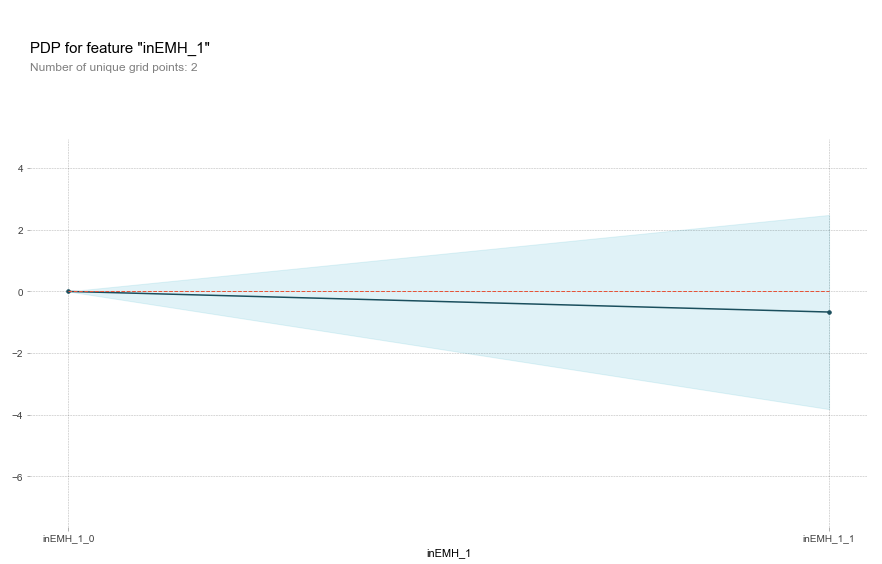

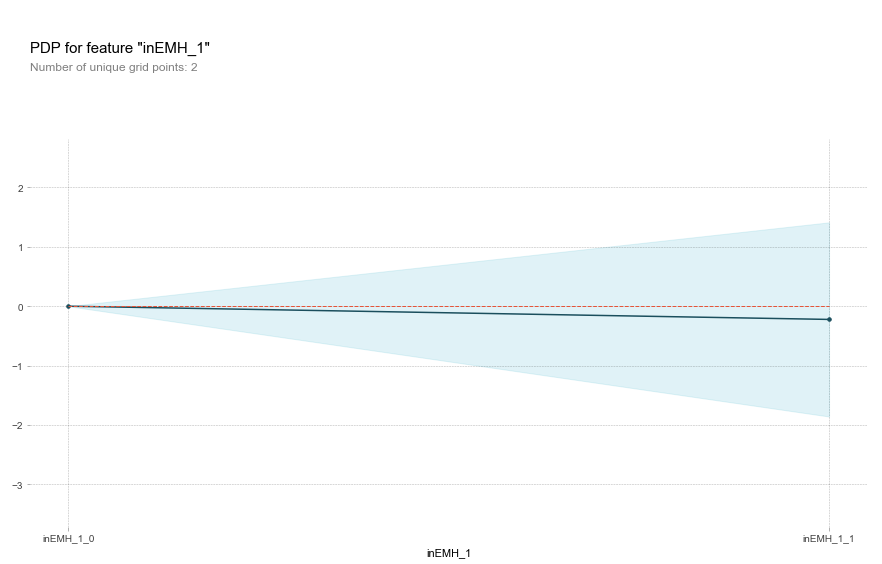

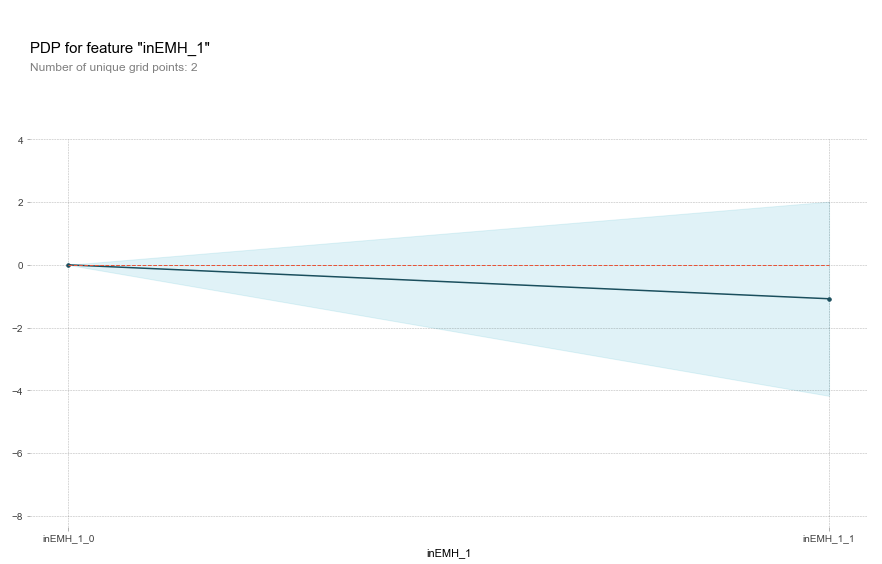

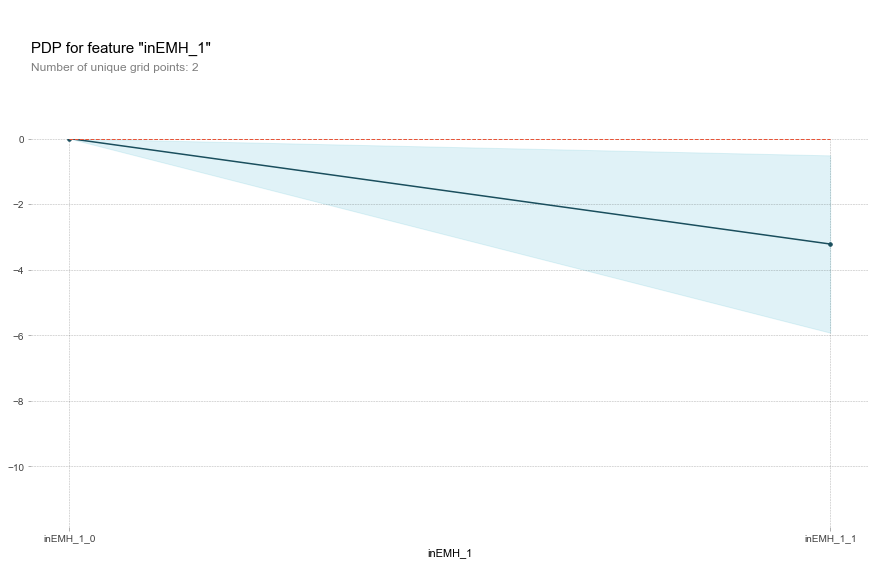

In [71]:
for key, value in todays_predictions.items():
    pdp_plot = value['pdp_plot']
    pdp.pdp_plot(pdp_plot, 'inEMH_1')

In [72]:
for key,value in todays_predictions.items():
    display(eli5.show_weights(value['weights_table'], feature_names = value['features_used']))

Weight,Feature
0.2878 ± 0.0279,MagicHourType_Night
0.2868 ± 0.0287,MinutesSinceOpen
0.2016 ± 0.0183,DayOfWeek_5
0.1755 ± 0.0158,DayOfWeek_0
0.1343 ± 0.0194,Month_9
0.1041 ± 0.0103,TimeSinceMidday
0.0948 ± 0.0106,Month_10
0.0508 ± 0.0095,Weekend_1
0.0180 ± 0.0025,DayOfWeek_2
0.0170 ± 0.0017,DayOfWeek_3


Weight,Feature
0.2577 ± 0.0211,MinutesSinceOpen
0.2545 ± 0.0283,Weekend_1
0.2362 ± 0.0394,Month_9
0.1191 ± 0.0150,TimeSinceOpen
0.0654 ± 0.0079,DayOfWeek_0
0.0579 ± 0.0060,DayOfWeek_4
0.0390 ± 0.0084,Month_10
0.0197 ± 0.0049,TimeSinceMidday
0.0187 ± 0.0059,DayOfWeek_2
0.0141 ± 0.0030,DayOfWeek_3


Weight,Feature
0.3757 ± 0.0409,TimeSinceMidday
0.3629 ± 0.0177,MinutesSinceOpen
0.1436 ± 0.0130,Month_9
0.0439 ± 0.0135,DayOfWeek_4
0.0424 ± 0.0097,DayOfWeek_2
0.0261 ± 0.0029,Month_10
0.0246 ± 0.0050,DayOfWeek_1
0.0197 ± 0.0041,DayOfWeek_0
0.0144 ± 0.0026,EMHDay_0
0.0138 ± 0.0023,Month_11


Weight,Feature
0.2605 ± 0.0159,MinutesSinceOpen
0.0747 ± 0.0097,DayOfWeek_0
0.0636 ± 0.0058,DayOfWeek_2
0.0597 ± 0.0074,Month_9
0.0551 ± 0.0076,Month_11
0.0453 ± 0.0094,DayOfWeek_4
0.0404 ± 0.0082,Month_10
0.0375 ± 0.0080,TimeSinceOpen
0.0324 ± 0.0052,DayOfWeek_1
0.0236 ± 0.0053,Weekend_1


## Ideal Scenarios and Conclusions
This was just a short introduction to the mystery that is Extra Magic Hours. If you skipped all the graphs laid out above, no worries, I'll sum it up for you here.

1. Extra Magic Hours make a difference. It is a huge benefit for those staying on property. Roughly 40% reduction in wait from a ride normally to one in Extra Magic Hours.
2. Night Extra Magic Hours make a larger difference than Day Extra Magic Hours by about 20%
3. Avoid Extra Magic Hour parks on a Saturday, those parks get more crowded because of the draw of Extra Magic Hours. Every other day it's not that much of a difference.
4. Prioritize where you go during the Extra Magic Hour by rides you don't already have a fastpass for, and rides that have the biggest difference. Avoid Avatar Flight of Passage.

If I had to plan a Saturday that had Extra Magic Hours at Magic Kingdom at Night I would do it as follows. Ideally I would have park hopper. I would start the day early in Hollywood Studios as a member of the general public, finish the day there around 6 or so, then park hop over to Magic Kingdom. As long as I haven't entered another Extra Magic Hour for that day I'll be good to go for the night time festivities at Magic Kingdom. I would watch the fireworks and watch the crowds dwindle down as Extra Magic Hours approached. Right when the Extra Magic Hour starts, I would head to high priority rides like Seven Dwarfs Mine train which would have a reduced wait by upwards of 30 minutes. 

The key in every day at Walt Disney World is to maximize your experience. Extra Magic Hours are pivotal in maximizing that time, when done in a smart efficient matter. Hopefully my brief exploration into this topic has helped and may bring a little extra magic to your next Disney vacation.